In [43]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

```
Main function:
initialize matrix[n][n]:
    for i=1->n-1:
        for j=1->(n + 1) // 2:
            matrix[i][j] = cal_probability(i,j);
            matrix[i][n - 1 - j] = matrix[i][j]



cal_probability(i,j):
    for m=1->100000:
        if (i,j) is on the bottom edge:
            return True
        else if (i,j) is on the other 3 edges:
            return False
        else:
            go with equal possibility one step, update (i,j)
    return False
```

In [44]:
# Step 1: One random walk simulation of a point.  

def random_walk(i, j, m):

    if i < 0 or i >= n or j < 0 or j >= n:    # Input error  
        raise NotImplementedError
    
    for _ in range(n_walk):
        if j == 0:    # Reach the bottom edge  
            return True
        elif j == n - 1 or i == 0 or i == n - 1:    # Reach the other 3 edges  
            return False 
        else:    # Not reach any edge: continue the random walk  
            dx = [-1, 1, 0, 0]    # Define the direction of random walk  
            dy = [0, 0, -1, 1]
            d = random.choice([0, 1, 2, 3])    # Chose a direction  
            i = i + dx[d]    # Walk one step  
            j = j + dy[d]
    return False    # Do not reach any edge after M steps  

In [45]:
# Step 2: Valuation and Initialize.  

m = 10000    # The number of random walk trials per lattice point  

n = 10    # Length of lattice  

n_walk = 2 ** 8    # The maximum number of steps in one random trial  

lattice = [[0 for _ in range(n)] for _ in range(n)]    # Init probability matrix  

for i in range(n):
    lattice[n - 1][i] = 1    # Init probabilities on the bottom edge  

In [46]:
# Step 3: Calculate the possibility for each lattice point.  
#
# Idea 1: Cal all the lattice.  
# Idea 2: Cal the left half of the lattice (optimizing).  
# Benefit: Speed up the code and reduce duplicate calculations.  

for i in range(1, n - 1):
    for j in range(1, (n + 1) // 2):
        cnt = 0        
    
        for _ in range(m):
            if (random_walk(i, j, n_walk)):    # Count the num  
                cnt += 1
                
        lattice[i][j] = cnt / m    # Cal the probability  
        lattice[i][n - 1 - j] = lattice[i][j]    # Copy to the symmetrical position on the right  

In [47]:
# Step 4: Establish spatial coordinate system (x,y,z).  

x = np.tile(np.arange(0, n), n).reshape(n, -1).T.reshape(-1)
y = np.tile(np.arange(0,n),n)
z = np.array(lattice).reshape(-1)

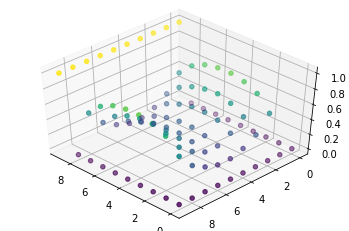

In [48]:
# Step 5.1: Draw the probability distribution.  

ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=z)
ax.view_init(45, 135)    # Adjust the Angle of view  

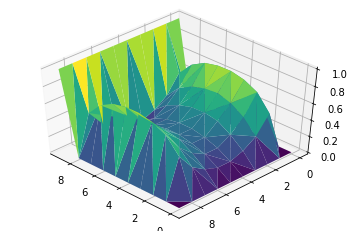

In [49]:
# Step 5.2: Draw the probability distribution.  

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.view_init(45, 135)

```
# as increase the number of trials, and also the number N
               the code convegence to probability ~= 1 near the left and right;
               the code convegence to probability ~= 0 near the top.
```